In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 14,7

### Задание 1

In [4]:
water = pd.read_csv('water.csv')

In [5]:
water2 = water.drop('Unnamed: 0', axis = 1)

In [6]:
water2

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


In [7]:
water2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   61 non-null     object
 1   town       61 non-null     object
 2   mortality  61 non-null     int64 
 3   hardness   61 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.0+ KB


<AxesSubplot:title={'center':'Correlation between hardness and mortality'}, xlabel='hardness', ylabel='mortality'>

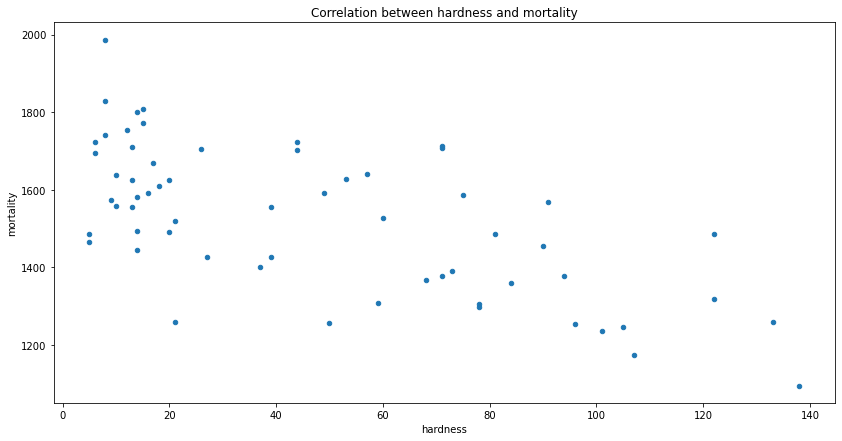

In [8]:
water2.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='Correlation between hardness and mortality') # можно предположить обратную корреляцию

In [9]:
water2[['hardness', 'mortality']].corr() # средневыраженная обратная корреляцию по Пирсону.

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [10]:
water2[['hardness', 'mortality']].corr(method='spearman') # почти то же самое по Спирману. 

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [11]:
# получается, чем выше жесткость воды, тем ниже смертность.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
X = water2[['hardness']]
y = water2['mortality']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [15]:
X_train.shape

(51, 1)

In [16]:
y_train.shape

(51,)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [18]:
model.coef_

array([-3.33250009])

In [19]:
model.intercept_

1681.4637295959956

In [22]:
# y = 1681 - 3.3 * x              # уравнение регрессии

In [23]:
y_pred = model.predict(X_test)
y_pred

array([1661.46872908, 1638.14122847, 1664.80122916, 1431.52622311,
       1638.14122847, 1628.14372821, 1238.24121809, 1661.46872908,
       1344.88122086, 1381.53872181])

In [24]:
# сравним модель и факты:
res_water = X_test.copy()
res_water['y_test'] = y_test
res_water['y_pred'] = y_pred.round()
res_water['diff'] = y_test - y_pred.round()
res_water

,hardness,y_test,y_pred,diff
40,6,1696,1661.0,35.0
42,13,1711,1638.0,73.0
2,5,1466,1665.0,-199.0
49,75,1587,1432.0,155.0
51,13,1557,1638.0,-81.0
26,16,1591,1628.0,-37.0
34,133,1259,1238.0,21.0
36,6,1724,1661.0,63.0
41,101,1236,1345.0,-109.0
39,90,1456,1382.0,74.0


In [25]:
res_water['diff'].std() # среднее отклонение разницы 105.

105.34309026541165

In [26]:
model.score(X_test, y_test) # коэффициент детерминации.

0.6368258436357874

In [50]:
from numpy import array

In [112]:
l = [100, 150, 505]

In [113]:
a = pd.DataFrame(l)

In [114]:
y_pred = model.predict(a) # если жесткость = 505, никто не умрёт))
y_pred

array([1348.21372094, 1181.58871662,   -1.4488141 ])

### Анализ остатков

In [27]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [29]:
X_const = sm.add_constant(X_train)

In [32]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     33.20
Date:                Sat, 07 Aug 2021   Prob (F-statistic):           5.44e-07
Time:                        11:21:21   Log-Likelihood:                -326.76
No. Observations:                  51   AIC:                             657.5
Df Residuals:                      49   BIC:                             661.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1681.6276     33.778     49.784      0.0

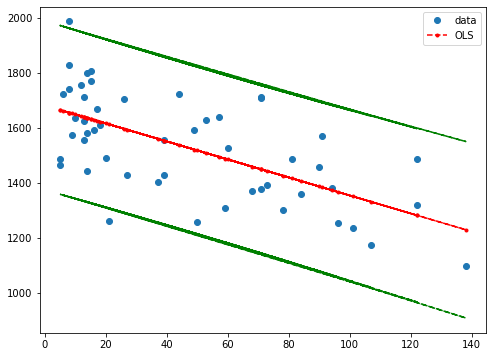

In [33]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best');

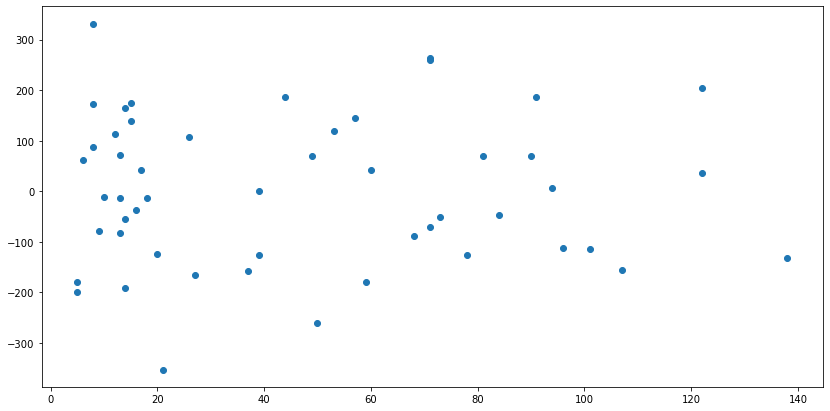

In [34]:
plt.scatter(X_const.iloc[:, 1], results.resid)

### Задание 2

In [90]:
north = water2[water2['location'] == 'North']

In [92]:
south = water2[water2['location'] == 'South']

In [93]:
north.head()

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


In [94]:
south.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


<AxesSubplot:title={'center':'North cities correlation between hardness and mortality'}, xlabel='hardness', ylabel='mortality'>

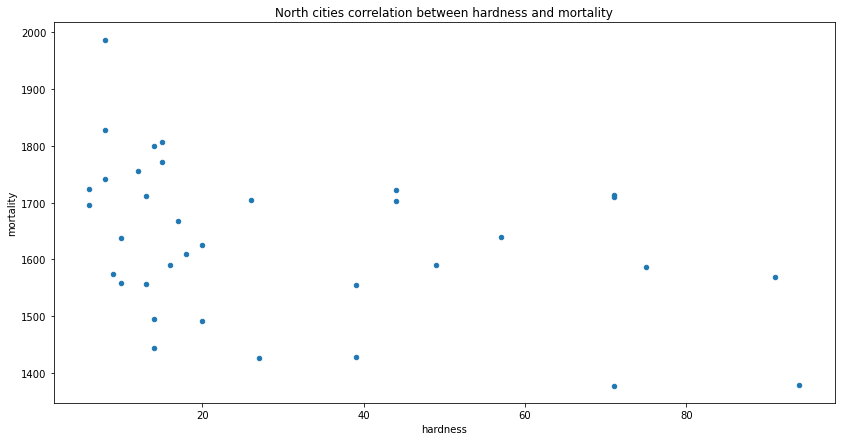

In [98]:
north.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='North cities correlation between hardness and mortality')

<AxesSubplot:title={'center':'South cities correlation between hardness and mortality'}, xlabel='hardness', ylabel='mortality'>

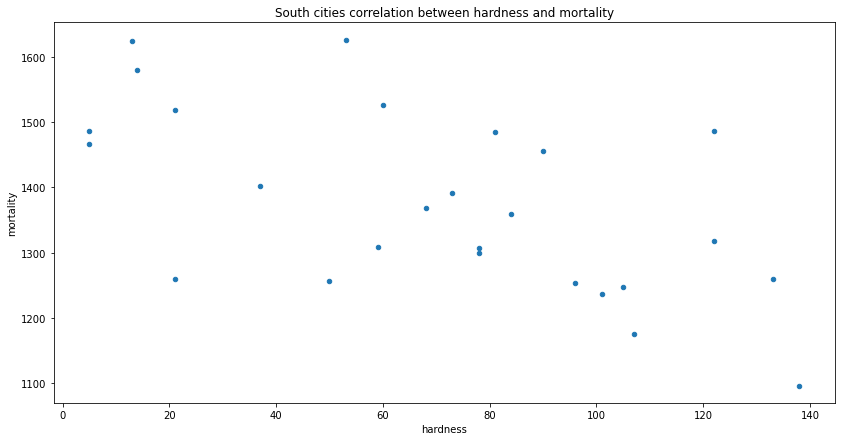

In [97]:
south.plot(kind='scatter', 
        x='hardness', 
        y='mortality', 
        title='South cities correlation between hardness and mortality')

In [99]:
north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [100]:
south[['hardness', 'mortality']].corr() # для южных городов корреляция выражена сильнее.

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [101]:
north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [102]:
south[['hardness', 'mortality']].corr(method='spearman')  # для южных городов корреляция выражена сильнее.

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [103]:
X = north[['hardness']]
y = north['mortality']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=2)

In [119]:
modelN = LinearRegression()
modelN.fit(X_train, y_train) 

LinearRegression()

In [120]:
modelN.coef_

array([-1.7596719])

In [121]:
modelN.intercept_

1684.8909397553377

In [123]:
# y = 1685 - 1.75 * x              # уравнение регрессии северных городов

In [124]:
y_predN = modelN.predict(X_test)
y_predN

array([1669.05389265, 1524.76079684, 1670.81356455, 1616.26373565])

In [125]:
res_north = X_test.copy()
res_north['y_testN'] = y_test
res_north['y_predN'] = y_predN.round()
res_north['diffN'] = y_test - y_predN.round()
res_north

,hardness,y_testN,y_predN,diffN
23,9,1574,1669.0,-95.0
24,91,1569,1525.0,44.0
45,8,1987,1671.0,316.0
17,39,1428,1616.0,-188.0


In [126]:
modelN.score(X_test, y_test) # весьма скромный R2. Вероятно, мало данных.

0.16217291243155596

In [127]:
# теперь для южных:

In [128]:
X = south[['hardness']]
y = south['mortality']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

In [170]:
modelS = LinearRegression()
modelS.fit(X_train, y_train) 

LinearRegression()

In [171]:
modelS.coef_

array([-2.71564917])

In [172]:
modelS.intercept_

1560.528499688428

In [173]:
# y = 1560 - 2.71 * x              # уравнение регрессии южных городов

In [174]:
y_predS = modelN.predict(X_test)
y_predS

array([1470.21096794, 1500.12539024, 1647.93782985, 1596.90734475,
       1676.09258025, 1660.25553315, 1547.63653155, 1537.07850014,
       1526.52046874, 1591.62832905, 1450.85457704, 1556.43489105,
       1442.05621754])

In [175]:
res_south = X_test.copy()
res_south['y_testN'] = y_test
res_south['y_predN'] = y_predS.round()
res_south['diffN'] = y_test - y_predS.round()
res_south

,hardness,y_testN,y_predN,diffN
58,122,1486,1470.0,16.0
0,105,1247,1500.0,-253.0
19,21,1260,1648.0,-388.0
48,50,1257,1597.0,-340.0
38,5,1486,1676.0,-190.0
32,14,1581,1660.0,-79.0
13,78,1307,1548.0,-241.0
9,84,1359,1537.0,-178.0
39,90,1456,1527.0,-71.0
57,53,1627,1592.0,35.0


In [179]:
modelN.score(X_test, y_test) # я перебирал разный test_size для южных городов. Значение ниже одно из лучших. 
                             # Видимо на малых объёмах выборки так и будет. Большой train оставит мало примеров с большим разбросом.
                             # А малый - приведёт к неточности самой модели. 

-1.3558748374514447